## T-Distibuted Stochastic Neighbourhood Embedding

### Problem statement
2.	By using “optdigits.csv” to solve the following tasks

a.	Build and apply t-SNE on the data

b.	Visualize the clusters with first 2 components of t-SNE using y variable as clusters

c.	Fine tune t-SNE function with perplexity (1,2,5,10,50)

d.	At which perplexity clusters are perfectly separated and more concrete.

### Solution approach 
the t-SNE algorithm to reduce the dimensionality of your data. The main parameter to tune is the perplexity, which controls the balance between preserving local and global structure.  We will Set a default value for perplexity to start with.

* Visualize the clusters: Plot the first two components of the t-SNE output and color the points based on the ground truth clusters (variable y). This will help us assess how well the clusters are separated.

* Fine-tune perplexity: Iterate through different perplexity values, reapply t-SNE, and visualize the results. Observe how the clusters change and determine which perplexity value provides better separation and more concrete clusters.



In [1]:
#Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the Dataset
Data= pd.read_csv('optdigits-1.csv')

In [3]:
Data

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
1,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
2,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
3,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
4,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,0,0,4,16,11,1,0,0,0,0,...,0,0,0,2,12,16,11,1,0,1
1151,0,0,0,0,7,11,1,0,0,0,...,0,0,0,2,0,7,11,0,0,1
1152,0,1,10,16,16,4,0,0,0,8,...,0,0,2,13,16,12,5,0,0,3
1153,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6


In [4]:
# Check for null values
Data.isnull().sum()

P0     0
P1     0
P2     0
P3     0
P4     0
      ..
P60    0
P61    0
P62    0
P63    0
y      0
Length: 65, dtype: int64

In [5]:
# information about the df
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P0      1155 non-null   int64
 1   P1      1155 non-null   int64
 2   P2      1155 non-null   int64
 3   P3      1155 non-null   int64
 4   P4      1155 non-null   int64
 5   P5      1155 non-null   int64
 6   P6      1155 non-null   int64
 7   P7      1155 non-null   int64
 8   P8      1155 non-null   int64
 9   P9      1155 non-null   int64
 10  P10     1155 non-null   int64
 11  P11     1155 non-null   int64
 12  P12     1155 non-null   int64
 13  P13     1155 non-null   int64
 14  P14     1155 non-null   int64
 15  P15     1155 non-null   int64
 16  P16     1155 non-null   int64
 17  P17     1155 non-null   int64
 18  P18     1155 non-null   int64
 19  P19     1155 non-null   int64
 20  P20     1155 non-null   int64
 21  P21     1155 non-null   int64
 22  P22     1155 non-null   int64
 23  P23     1155 

In [6]:
# dropping y
dData = Data.drop(columns=['y'])
# scaling the data
from sklearn.preprocessing import StandardScaler
finalData = StandardScaler().fit_transform(dData)

In [7]:
finalData

array([[ 0.        , -0.3467153 ,  0.12637569, ..., -0.53961155,
        -0.71851058, -0.17156627],
       [ 0.        , -0.3467153 , -0.98108955, ...,  0.81738981,
        -0.47789599, -0.17156627],
       [ 0.        , -0.3467153 ,  0.56936178, ...,  0.04196046,
        -0.47789599, -0.17156627],
       ...,
       [ 0.        ,  0.87418765,  1.23384092, ..., -0.92732623,
        -0.71851058, -0.17156627],
       [ 0.        , -0.3467153 , -0.31661041, ..., -0.15189687,
        -0.71851058, -0.17156627],
       [ 0.        , -0.3467153 ,  0.34786873, ...,  1.20510449,
         0.48456237, -0.17156627]])

In [8]:
# t-SNE
from sklearn.manifold import TSNE

## Ans 2a, b &c )applying t-SNE, Visualizing & Fine tuning 

### Perplexity =50

In [9]:
tsne50= TSNE(n_components=2, learning_rate=50,random_state=42, perplexity=50.0)

In [10]:
x50 = tsne50.fit_transform(finalData)

In [11]:
x50

array([[  2.6123695,  37.634678 ],
       [ 13.623028 , -21.27024  ],
       [-20.720572 ,  -6.1088367],
       ...,
       [-25.09431  , -12.761479 ],
       [ 10.571104 ,  32.43786  ],
       [ 14.510987 ,  38.41578  ]], dtype=float32)

In [12]:
finalData_reduced= pd.DataFrame(x50,columns=['Factor1','Factor2'])
finalData_reduced.head()

,Factor1,Factor2
0,2.612370,37.634678
1,13.623028,-21.270241
2,-20.720572,-6.108837
3,5.329328,9.194877
4,2.534029,33.753822


<AxesSubplot:xlabel='Factor1', ylabel='Factor2'>

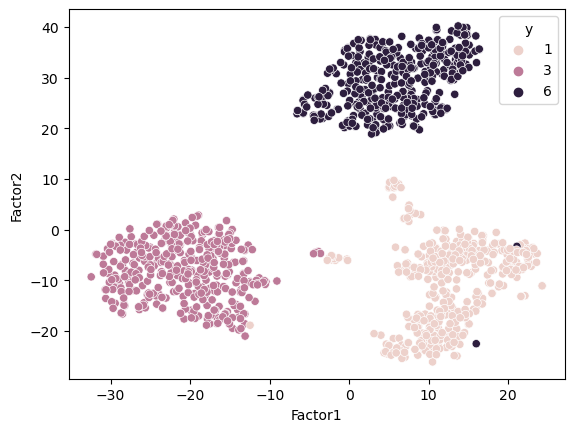

In [13]:
sns.scatterplot(finalData_reduced['Factor1'],finalData_reduced['Factor2'],hue=Data['y'])

### perplexity = 10

<AxesSubplot:xlabel='Factor1', ylabel='Factor2'>

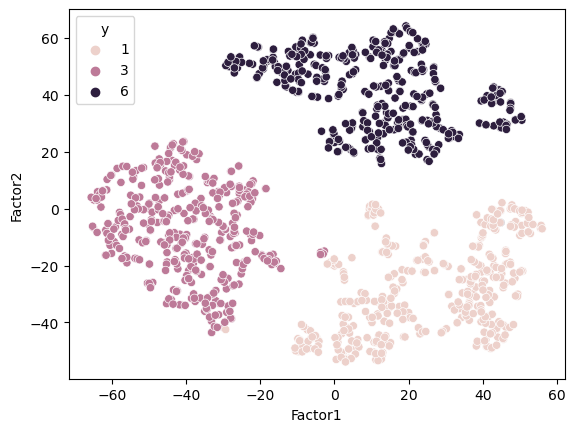

In [14]:
tsne10= TSNE(n_components=2, learning_rate=50,random_state=42, perplexity=10.0)

x10 = tsne10.fit_transform(finalData)

x10

finalData_reduced= pd.DataFrame(x10,columns=['Factor1','Factor2'])
finalData_reduced.head()

sns.scatterplot(finalData_reduced['Factor1'],finalData_reduced['Factor2'],hue=Data['y'])

### perplexity = 5

<AxesSubplot:xlabel='Factor1', ylabel='Factor2'>

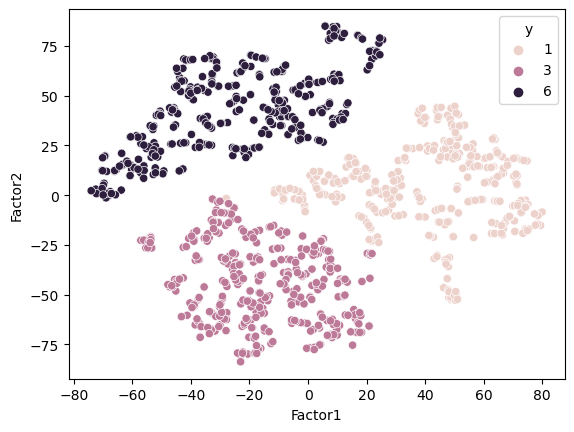

In [15]:
tsne5= TSNE(n_components=2, learning_rate=50,random_state=42, perplexity=5.0)

x5 = tsne5.fit_transform(finalData)

x5

finalData_reduced= pd.DataFrame(x5,columns=['Factor1','Factor2'])
finalData_reduced.head()

sns.scatterplot(finalData_reduced['Factor1'],finalData_reduced['Factor2'],hue=Data['y'])

### perplexity 2

<AxesSubplot:xlabel='Factor1', ylabel='Factor2'>

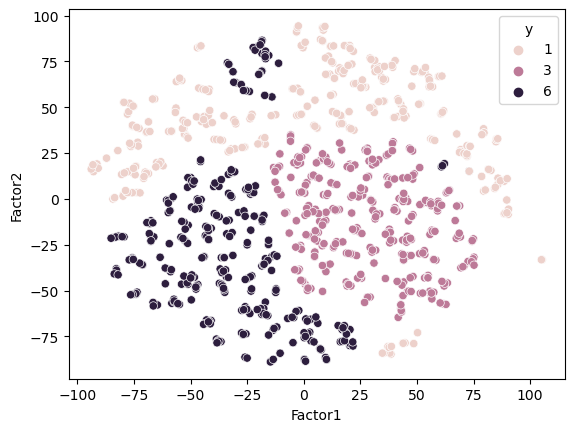

In [16]:
tsne2= TSNE(n_components=2, learning_rate=50,random_state=42, perplexity=2.0)

x2 = tsne2.fit_transform(finalData)


finalData_reduced= pd.DataFrame(x2,columns=['Factor1','Factor2'])
finalData_reduced.head()

sns.scatterplot(finalData_reduced['Factor1'],finalData_reduced['Factor2'],hue=Data['y'])

### perplexity =1

<AxesSubplot:xlabel='Factor1', ylabel='Factor2'>

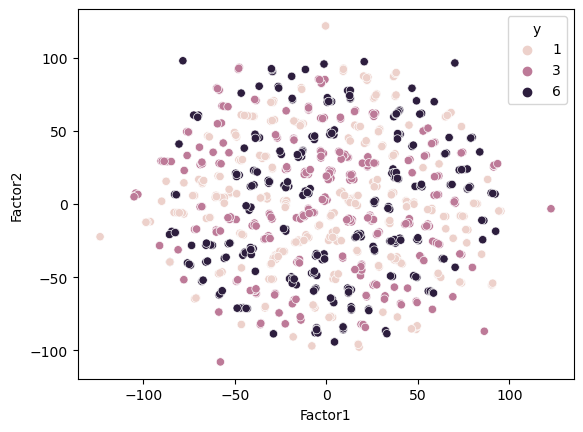

In [17]:
tsne1= TSNE(n_components=2, learning_rate=50,random_state=42, perplexity=1.0)

x1 = tsne1.fit_transform(finalData)

finalData_reduced= pd.DataFrame(x1,columns=['Factor1','Factor2'])
finalData_reduced.head()

sns.scatterplot(finalData_reduced['Factor1'],finalData_reduced['Factor2'],hue=Data['y'])

# Conclusion from finetuning on perplexity
###  Ans 2d) clusters are best separated at perplextity = 50 with lesser consolidation as perplexity reduces, significant mixing at perplexity = 1 & 2 

 we  can also run the above code in a for loop to automate plotting
  Conclusion is the same 

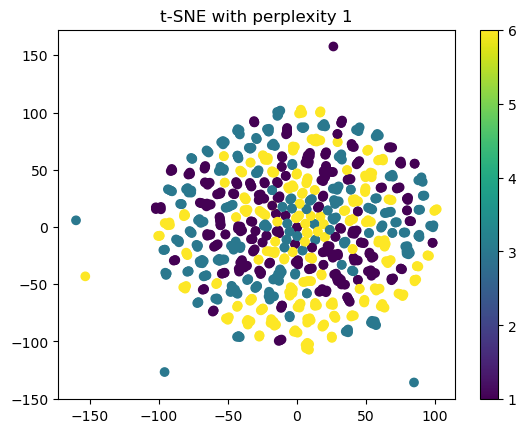

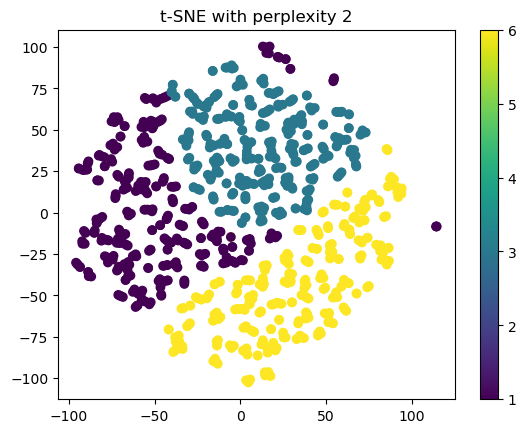

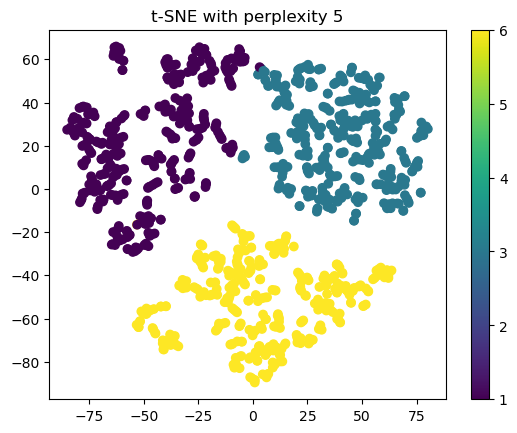

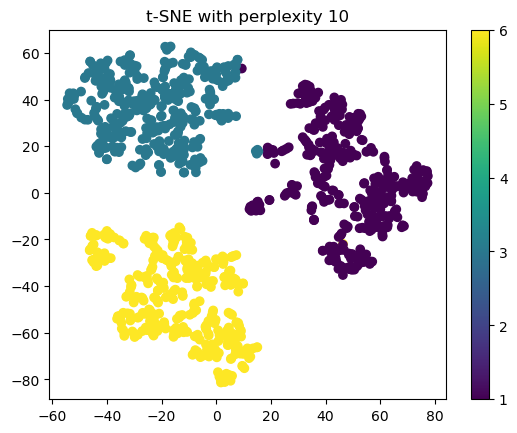

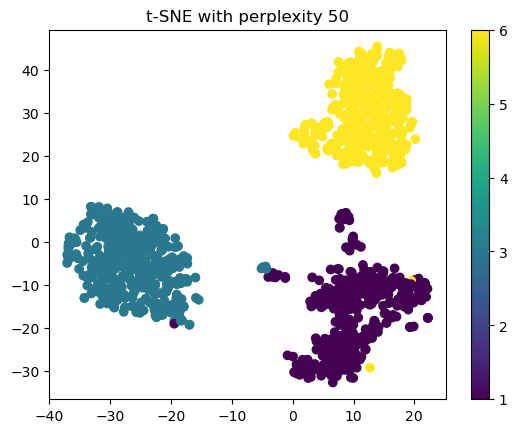

In [21]:
# Step 3: Apply t-SNE
perplexities = [1, 2, 5, 10, 50]  # Perplexity values to try

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(finalData)

    # Step 4: Visualize the clusters
    plt.figure()
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Data['y'])
    plt.title(f"t-SNE with perplexity {perplexity}")
    plt.colorbar()
    plt.show()


# Arranging plots in a grid for easy comparison

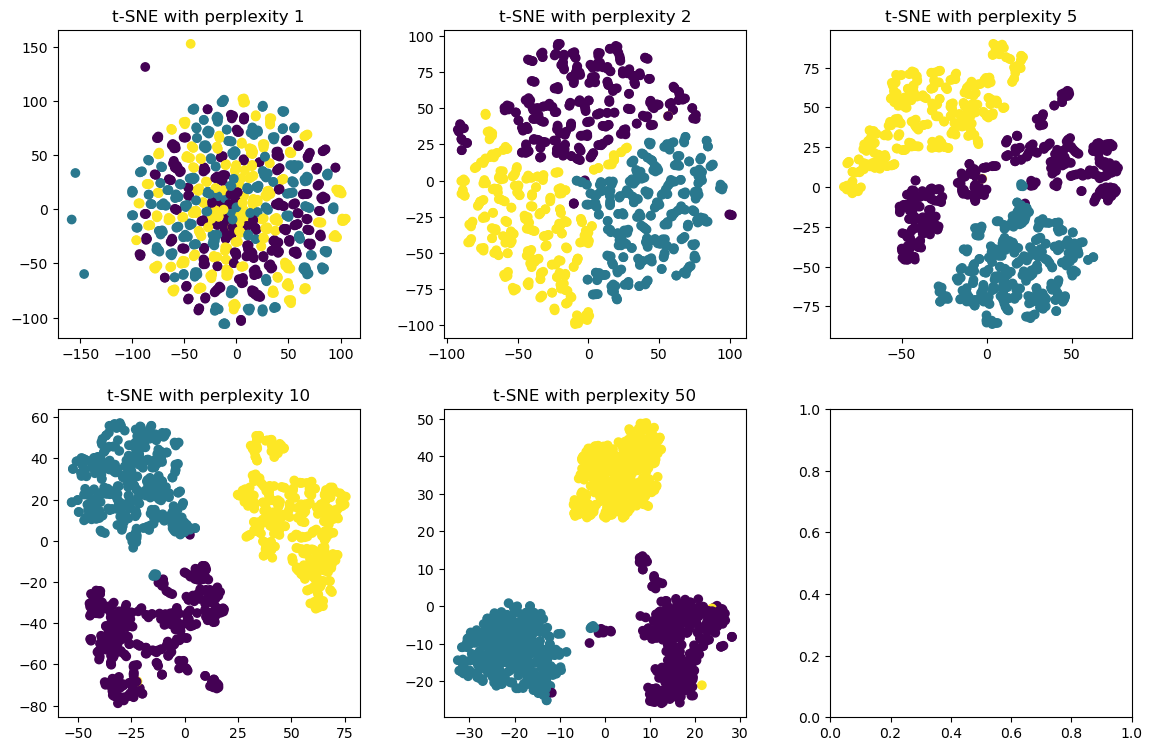

In [25]:

perplexities = [1, 2, 5, 10, 50]  # Perplexity values to try

# Create a grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=3.0)  # Adjust the padding between subplots

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(finalData)

    # Plot the t-SNE visualization in the corresponding subplot
    ax = axes[i // 3, i % 3]  # Calculate the subplot index
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Data['y'])
    ax.set_title(f"t-SNE with perplexity {perplexity}")
    

plt.show()


# extending the problem Checking for even higher values of perplexity 

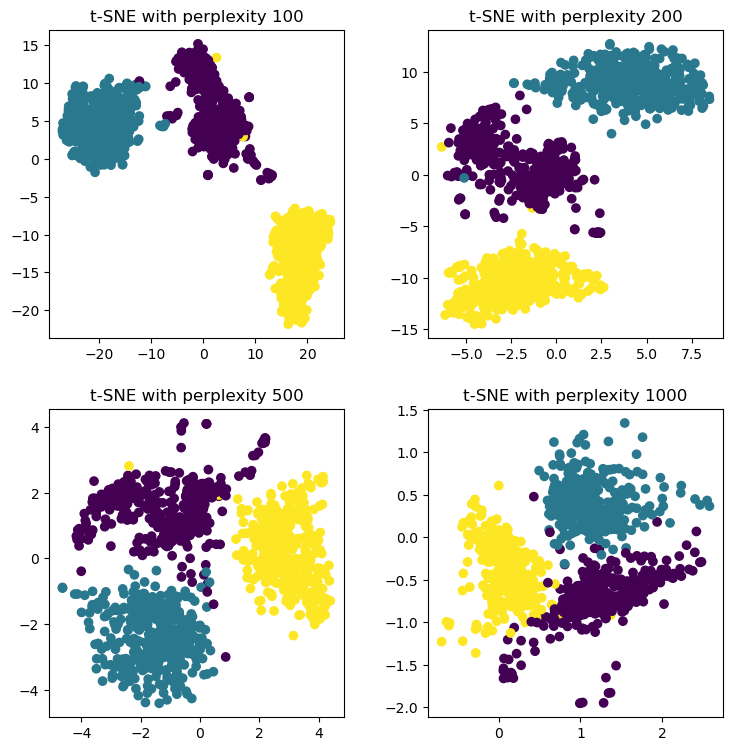

In [26]:
perplexities = [100, 200, 500, 1000,]  # Perplexity values to try

# Create a grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout(pad=3.0)  # Adjust the padding between subplots

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(finalData)

    # Plot the t-SNE visualization in the corresponding subplot
    ax = axes[i // 2, i % 2]  # Calculate the subplot index
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Data['y'])
    ax.set_title(f"t-SNE with perplexity {perplexity}")
    

plt.show()

## therefore we observe deterioration of quality of separation beyond perplexity = 100